In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("training_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [4]:
df.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
X = df.drop(columns=['Loan_ID','Loan_Status'])
Y = df[['Loan_Status']]

In [7]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban


In [8]:
Y

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [9]:
Y['Loan_Status'] = Y['Loan_Status'].replace({'Y': 1, 'N': 0})

In [10]:
Y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [11]:
cat = list(X.columns[X.dtypes==object])
con = list(X.columns[X.dtypes!=object])

In [12]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [13]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [16]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [17]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__ApplicantIncome,num__CoapplicantIncome,num__LoanAmount,num__Loan_Amount_Term,num__Credit_History,cat__Gender_Female,cat__Gender_Male,cat__Married_No,cat__Married_Yes,cat__Dependents_0,cat__Dependents_1,cat__Dependents_2,cat__Dependents_3+,cat__Education_Graduate,cat__Education_Not Graduate,cat__Self_Employed_No,cat__Self_Employed_Yes,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban
0,0.073497,-0.554104,-0.211241,0.273231,0.411733,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.261168,-0.038356,-0.211241,0.273231,0.411733,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.393199,-0.554104,-0.948996,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.461507,0.252351,-0.306435,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.098232,-0.554104,-0.056551,0.273231,0.411733,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=42)

In [20]:
xtrain.head()

,num__ApplicantIncome,num__CoapplicantIncome,num__LoanAmount,num__Loan_Amount_Term,num__Credit_History,cat__Gender_Female,cat__Gender_Male,cat__Married_No,cat__Married_Yes,cat__Dependents_0,cat__Dependents_1,cat__Dependents_2,cat__Dependents_3+,cat__Education_Graduate,cat__Education_Not Graduate,cat__Self_Employed_No,cat__Self_Employed_Yes,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban
553,-0.482639,0.243800,0.419420,0.273231,-2.428760,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
601,-0.410562,0.400782,0.110039,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
261,-0.547180,0.201391,-0.139846,0.273231,0.411733,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
496,-0.458723,0.027309,-0.461126,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
529,0.226495,-0.554104,-0.187443,0.273231,0.411733,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [21]:
ytrain.head()

,Loan_Status
553,0
601,1
261,1
496,1
529,1


In [22]:
xtest.head()

,num__ApplicantIncome,num__CoapplicantIncome,num__LoanAmount,num__Loan_Amount_Term,num__Credit_History,cat__Gender_Female,cat__Gender_Male,cat__Married_No,cat__Married_Yes,cat__Dependents_0,cat__Dependents_1,cat__Dependents_2,cat__Dependents_3+,cat__Education_Graduate,cat__Education_Not Graduate,cat__Self_Employed_No,cat__Self_Employed_Yes,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban
350,0.603259,-0.554104,0.978687,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
377,-0.178607,-0.554104,-0.187443,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
163,-0.202032,-0.059219,0.145737,0.273231,0.411733,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
609,-0.409580,-0.554104,-0.889500,0.273231,0.411733,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
132,-0.439393,-0.554104,-0.901399,0.273231,0.411733,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [23]:
ytest.head()

,Loan_Status
350,1
377,1
163,1
609,1
132,1


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [25]:
dct = {'Logistic' : LogisticRegression(),
       'Decision tree' : DecisionTreeClassifier(),
       'random forest' : RandomForestClassifier(),
       'GBC' : GradientBoostingClassifier(),
       'SVC' : SVC(),
       'KNN' : KNeighborsClassifier()}

In [26]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision tree', DecisionTreeClassifier()), ('random forest', RandomForestClassifier()), ('GBC', GradientBoostingClassifier()), ('SVC', SVC()), ('KNN', KNeighborsClassifier())])

In [27]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [28]:
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    # 5 - fold cross validation on training
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    # Print above results for each model
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Train F1 Cross Validated : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n=========================================================================\n')

Model name : Logistic

Train F1 : 0.8852
Train F1 Cross Validated : 0.7335
Test F1 : 0.8551


Model name : Decision tree

Train F1 : 1.0000
Train F1 Cross Validated : 0.6587
Test F1 : 0.7874


Model name : random forest

Train F1 : 1.0000
Train F1 Cross Validated : 0.7391
Test F1 : 0.8433


Model name : GBC

Train F1 : 0.9350
Train F1 Cross Validated : 0.7341
Test F1 : 0.8352


Model name : SVC

Train F1 : 0.8909
Train F1 Cross Validated : 0.7270
Test F1 : 0.8592


Model name : KNN

Train F1 : 0.8934
Train F1 Cross Validated : 0.7214
Test F1 : 0.8382




In [29]:
list(dct.keys())

['Logistic', 'Decision tree', 'random forest', 'GBC', 'SVC', 'KNN']

In [30]:
results_dct = {'Model_name' : list(dct.keys()),
               'Train F1':tr,
               'Test F1':ts,
               'Train F1 CV':tr_cv}

In [31]:
results_df = pd.DataFrame(results_dct)
results_df

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.885246,0.855072,0.733476
1,Decision tree,1.000000,0.787402,0.658745
2,random forest,1.000000,0.843284,0.739126
3,GBC,0.934985,0.835165,0.734105
4,SVC,0.890882,0.859206,0.726961
5,KNN,0.893354,0.838235,0.721378


In [32]:
results_df = results_df.sort_values(by='Test F1', ascending=False)
results_df

,Model_name,Train F1,Test F1,Train F1 CV
4,SVC,0.890882,0.859206,0.726961
0,Logistic,0.885246,0.855072,0.733476
2,random forest,1.000000,0.843284,0.739126
5,KNN,0.893354,0.838235,0.721378
3,GBC,0.934985,0.835165,0.734105
1,Decision tree,1.000000,0.787402,0.658745


CHOOSING RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1, max_depth=1, min_samples_split=5, min_samples_leaf=3, criterion='gini')
model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=1)

In [34]:
model.score(xtrain, ytrain)

0.8205128205128205

In [35]:
model.score(xtest, ytest)

0.7837837837837838

In [36]:
params = {'n_estimators':[10, 50, 100, 200],
          'max_depth':[2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8, 9],
          'criterion':['gini', 'entropy']}

In [37]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [38]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'max_depth': 5,
 'criterion': 'gini'}

In [39]:
rscv.best_score_

0.7334760159805214

In [40]:
best_model = SVC(probability=True)
best_model.fit(xtrain, ytrain)

SVC(probability=True)

In [41]:
best_model.score(xtrain, ytrain)

0.8298368298368298

In [42]:
best_model.score(xtest, ytest)

0.7891891891891892

In [43]:
ypred_tr = best_model.predict(xtrain)
ypred_ts = best_model.predict(xtest)

In [44]:
ypred_tr[0:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [45]:
ytrain.head()

,Loan_Status
553,0
601,1
261,1
496,1
529,1


In [46]:
ypred_ts[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [47]:
ytest.head()

,Loan_Status
350,1
377,1
163,1
609,1
132,1


In [48]:
c = best_model.classes_
c

array([0, 1], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [50]:
cf = confusion_matrix(ytest,ypred_ts)


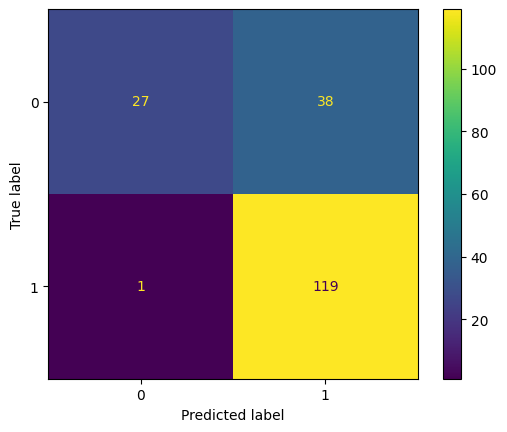

In [51]:
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.96      0.42      0.58        65
           1       0.76      0.99      0.86       120

    accuracy                           0.79       185
   macro avg       0.86      0.70      0.72       185
weighted avg       0.83      0.79      0.76       185



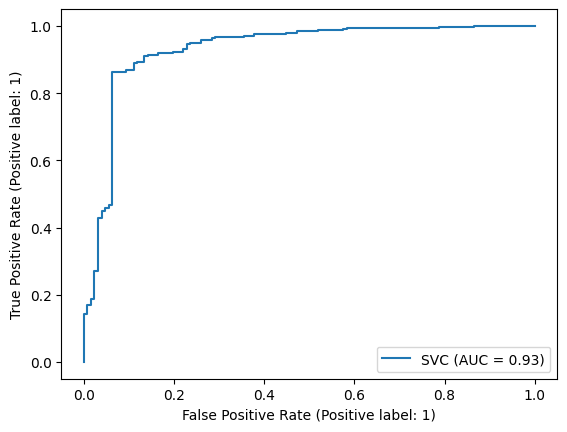

In [53]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model,xtrain,ytrain)


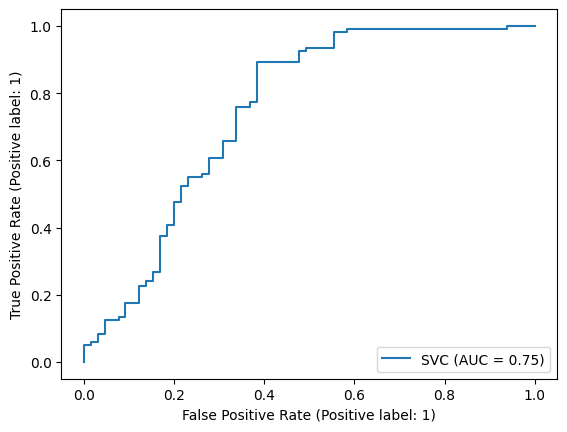

In [54]:
RocCurveDisplay.from_estimator(best_model,xtest,ytest)

In [55]:
auc_score = cross_val_score(best_model, xtrain, ytrain, cv=10, scoring='roc_auc')

In [56]:
auc_score

array([0.87692308, 0.68974359, 0.78205128, 0.60512821, 0.88461538,
       0.78974359, 0.70769231, 0.80645161, 0.7016129 , 0.76388889])

In [57]:
auc_score.mean()

0.7607850840915358

In [58]:
xnew = pd.read_csv('testing_set.csv')
xnew.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [59]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term',
                                  'Credit_History']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Gender', 'Married', 'Dependents',
                                  'Education', 'Self_Employed',
                                  'Property_Area'])])

In [60]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__ApplicantIncome,num__CoapplicantIncome,num__LoanAmount,num__Loan_Amount_Term,num__Credit_History,cat__Gender_Female,cat__Gender_Male,cat__Married_No,cat__Married_Yes,cat__Dependents_0,cat__Dependents_1,cat__Dependents_2,cat__Dependents_3+,cat__Education_Graduate,cat__Education_Not Graduate,cat__Self_Employed_No,cat__Self_Employed_Yes,cat__Property_Area_Rural,cat__Property_Area_Semiurban,cat__Property_Area_Urban
0,0.052365,-0.554104,-0.425428,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.380749,-0.041092,-0.235040,0.273231,0.411733,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.065578,0.061510,0.740701,0.273231,0.411733,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.501313,0.316648,-0.544421,0.273231,0.411733,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.347987,-0.554104,-0.806205,0.273231,0.411733,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.227914,0.053644,-0.389730,0.273231,0.411733,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
363,-0.203506,-0.311620,-0.365932,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
364,-0.352246,0.127518,-0.235040,0.273231,0.411733,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
365,-0.065578,0.264321,0.145737,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [62]:
preds = best_model.predict(xnew_pre)
preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [63]:
best_model.classes_

array([0, 1], dtype=int64)

In [64]:
probs = best_model.predict_proba(xnew_pre)[:, 1]
probs[0:5]

array([0.81891709, 0.81938998, 0.82569273, 0.81248603, 0.76311291])

In [65]:
df_final = xnew[['Loan_ID']]
df_final

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [66]:
df_final['Loan_Status_pred']=preds
df_final['Loan_Status_prob']=probs

In [74]:
df_final['Loan_Status_pred'] = df_final['Loan_Status_pred'].replace({1 : 'Y', 0 : 'N'})

In [75]:
df_final

,Loan_ID,Loan_Status_pred,Loan_Status_prob
0,LP001015,Y,0.818917
1,LP001022,Y,0.819390
2,LP001031,Y,0.825693
3,LP001035,Y,0.812486
4,LP001051,Y,0.763113
...,...,...,...
362,LP002971,Y,0.808325
363,LP002975,Y,0.816163
364,LP002980,Y,0.816013
365,LP002986,Y,0.816342


In [76]:
df_final.to_csv('Results.csv', index=False)

In [77]:
df_final['Loan_Status_pred'].value_counts()

Loan_Status_pred
Y    307
N     60
Name: count, dtype: int64

<Axes: title={'center': 'LOAN STATUS PREDICTION'}, xlabel='Loan_Status_pred'>

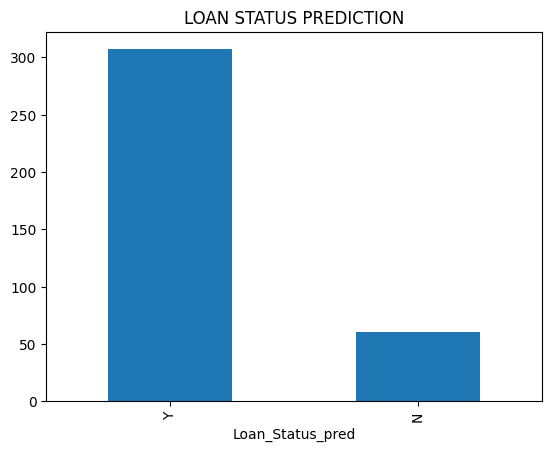

In [78]:
df_final['Loan_Status_pred'].value_counts().plot(kind='bar', title='LOAN STATUS PREDICTION')